In [78]:
import pandas as pd
from sql_functions import get_dataframe
import matplotlib.pyplot as plt
import numpy as np

In [79]:
df = pd.read_excel('data/GTI_2012-2021.xlsx')

In [80]:
df.columns = df.columns.str.lower()
cols = df.columns.tolist()
cols = [col.replace('/', '').replace(' ', '_') for col in cols]
df.columns = cols

In [81]:
df = df.sort_values(by=['year','country'], ascending=[True, True]).reset_index(drop=True)

In [82]:
df_iso = pd.read_csv('data/worldcities.csv')

In [83]:
iso3_map = dict(zip(df_iso['country'], df_iso['iso3']))

In [84]:
country_names = ['Antigua & Barbuda', 'Bahamas', 'Bosnia-Herzegovina', 'China/Hong Kong', 'Comoros Islands',
                 'Czech Republic', 'Dem. Rep. of Congo', 'Gambia', 'Korea South', 'Macao', 'Virgin Islands',
                 'Curacao', 'St. Maarten', 'USA', 'Georgia (Europe)', 'Dem.Rep. of Congo', 'Republic of the Congo',
                 'Ivory Coast', 'Trinidad & Tobago', 'Central African Rep.', 'Indonesia/Aceh', 'USA*',
                 'Virgin Islands (USA)', 'Chechnya', 'Rep. of the Congo', 'Saint Maarten', 'China incl. Hong Kong',
                 'North Macedonia', 'Korea North', 'Bonaire', 'Bosnia-Hercegovina', 'Moldovia', 'Cape Verde',
                 'Saint Kitts & Nevis', 'Maledives']

iso3_values = ['ATG', 'BHS', 'BIH', 'HKG', 'COM', 'CZE', 'COD', 'GMB', 'KOR', 'MAC', 'VIR', 'CUW', 'SXM', 'USA',
               'GEO', 'COD', 'COG', 'CIV', 'TTO', 'CAF', 'IDN', 'USA', 'VIR', 'RUS', 'COG', 'SXM', 'CHN', 'MKD',
               'PRK', 'BES', 'BIH', 'MDA', 'CPV', 'KNA', 'MDV']

country_iso3_dict = dict(zip(country_names, iso3_values))

In [85]:
iso3_map.update(country_iso3_dict)

In [86]:
df['iso3'] = df['country'].map(iso3_map)

In [87]:
df = df[['iso3'] + [col for col in df.columns if col != 'iso3']]

In [92]:
df

,iso3,country,ranking,year,total,antidiscrimination_legislation,marriage__civil_partnership,adoption_allowed,lgbt_marketing,equal_age_of_consent,...,anti-gay_laws,homosexuality_illegal,pride_banned,locals_hostile,prosecution,murders,death_sentence,trans_gender_rights,intersex__3rd_option,conversion_therapy
0,ALB,Albania,88,2012,-3,0,0,0,0.0,0,...,0,0,0,-2,0,0,0,NaN,NaN,NaN
1,AND,Andorra,29,2012,2,2,1,0,0.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,ARG,Argentina,14,2012,4,0,2,2,1.0,1,...,0,0,0,-1,0,0,0,NaN,NaN,NaN
3,ARM,Armenia,59,2012,-1,0,0,0,0.0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,ABW,Aruba,38,2012,1,0,0,0,0.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,VNM,Vietnam,66,2021,-3,0,-1,0,0.0,0,...,0,0,0,0,0,0,0,0.0,-1.0,-1.0
1773,VIR,Virgin Islands,51,2021,0,1,2,2,0.0,0,...,0,0,0,-1,0,-1,0,0.0,-1.0,-1.0
1774,YEM,Yemen,198,2021,-15,0,-1,0,0.0,0,...,-1,-1,0,-2,-1,-2,-1,-1.0,-1.0,-1.0
1775,ZMB,Zambia,150,2021,-10,0,-1,0,0.0,0,...,-1,-1,0,-2,-1,0,0,0.0,-1.0,-1.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   iso3                            1777 non-null   object 
 1   country                         1777 non-null   object 
 2   ranking                         1777 non-null   int64  
 3   year                            1777 non-null   int64  
 4   total                           1777 non-null   int64  
 5   antidiscrimination_legislation  1775 non-null   object 
 6   marriage__civil_partnership     1776 non-null   object 
 7   adoption_allowed                1776 non-null   object 
 8   lgbt_marketing                  1394 non-null   float64
 9   equal_age_of_consent            1777 non-null   int64  
 10  religious_influence             1775 non-null   object 
 11  hiv_travel_restrictions         1769 non-null   object 
 12  anti-gay_laws                   17

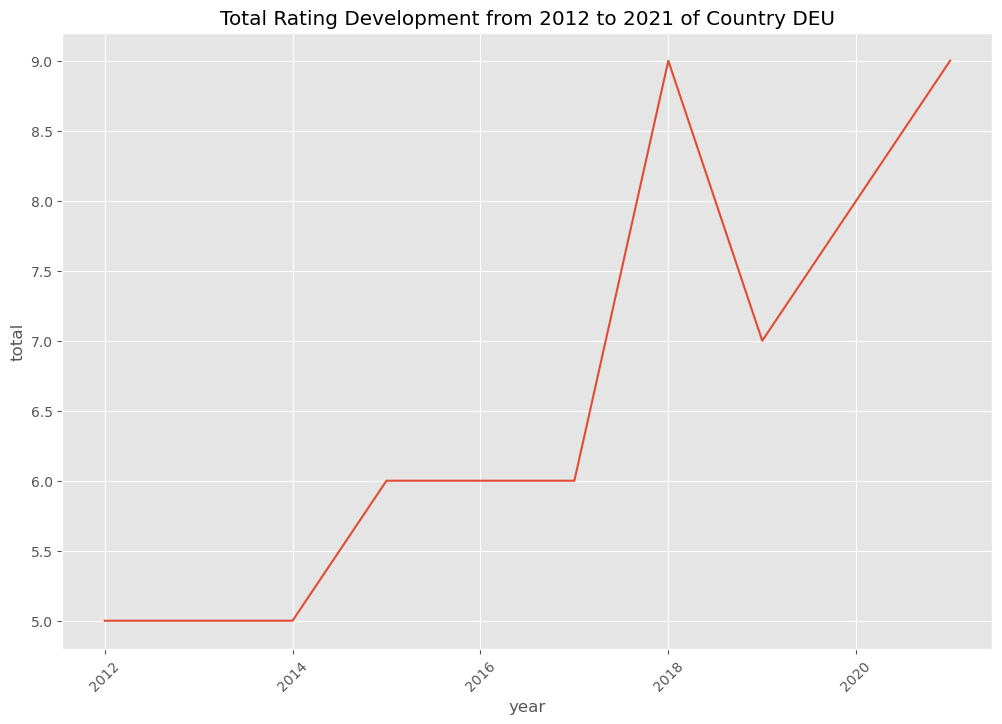

In [95]:
country = 'DEU'
xcol = 'year'
ycol = 'total'

xs = df[df['iso3'] == country][xcol]
ys = df[df['iso3'] == country][ycol]
xs, ys = zip(*sorted(zip(xs, ys)))

plt.style.use('ggplot') 
plt.figure(figsize=(12, 8))

plt.plot(xs, ys)

plt.xticks(rotation=45)
plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title(f"Total Rating Development from 2012 to 2021 of Country {country}")

plt.show()